# **Ejercicios de pair programming Módulo 3 Sprint 1**
## **Regreción Lineal IV: Lección 4**

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.



El objetivo de este pairprgramming es que evaluéis si vuestro set de datos cumple todas las asunciones que se deben cumplir para hacer una regresión lineal. 

Recordamos que estas asunciones son:

- Normalidad (ya la deberíais haber evaluado)
- Homogeneidad de varianzas
- Independencia de las variables
  
Cada asunción la deberéis testar de forma visual y analítica.

In [2]:

import pandas as pd
import numpy as np


import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

import statsmodels.api as sm
from scipy.stats import skew
from scipy.stats import kurtosistest
from scipy import stats

pd.options.display.max_columns = None


In [4]:
df = pd.read_csv("datos/soci_econ_country_profiles_resumido.csv", index_col = 0)
df.head(2)

,country,region,population_in_thousands_(2017),employment:_agriculture_(%_of_employed),employment:_industry_(%_of_employed),employment:_services_(%_of_employed),education:_government_expenditure_(%_of_gdp),quality_of_life_index,purchasing_power_index,safety_index,cost_of_living,restaurant_price_index,consumer_price_index_(2010_=_100),human_capital_index_(hci)_(scale_0-1),"inflation,_consumer_prices_(annual_%)",urban_population_(%_of_total_population)_y,"population_age_distribution_(0-14_years,_%)","population_age_distribution_(60+_years,_%)",international_migrant_stock_(%_of_total_pop.)
0,Argentina,SouthAmerica,44271,2.0,24.8,73.1,5.3,139.59,58.40,37.37,52.57,50.37,112.887108,0.611,NaN,91.749,24.9,15.4,4.8
1,Australia,Oceania,24451,2.7,21.2,76.1,5.2,176.54,101.94,57.58,80.66,77.12,115.686785,0.803,1.948647,85.904,19.0,21.0,28.2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 0 to 65
Data columns (total 19 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   country                                        66 non-null     object 
 1   region                                         66 non-null     object 
 2   population_in_thousands_(2017)                 66 non-null     int64  
 3   employment:_agriculture_(%_of_employed)        66 non-null     float64
 4   employment:_industry_(%_of_employed)           66 non-null     float64
 5   employment:_services_(%_of_employed)           66 non-null     float64
 6   education:_government_expenditure_(%_of_gdp)   60 non-null     float64
 7   quality_of_life_index                          66 non-null     float64
 8   purchasing_power_index                         66 non-null     float64
 9   safety_index                                   66 non-nu

1. Normalidad: se calcula sobre la variable respuesta 
   - Analíticas: Shapiro o Kolmogorov-Smirnov
   - Gráficas: histplot, displot, qqplot

In [4]:
stats.shapiro(df['restaurant_price_index'])

ShapiroResult(statistic=0.9227616786956787, pvalue=0.0005270884139463305)

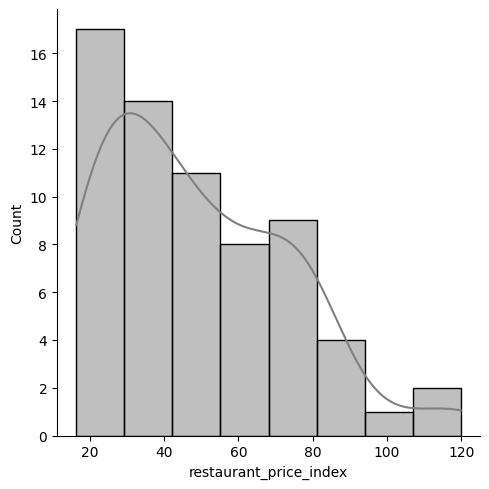

In [5]:
sns.displot(df['restaurant_price_index'], kde = True, color = "grey");

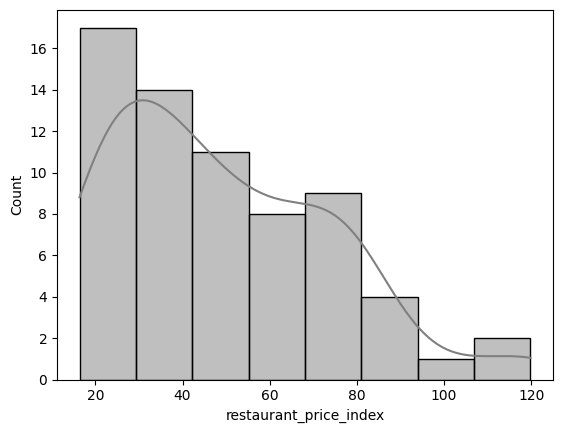

In [6]:
sns.histplot(df['restaurant_price_index'], kde = True, color = "grey");

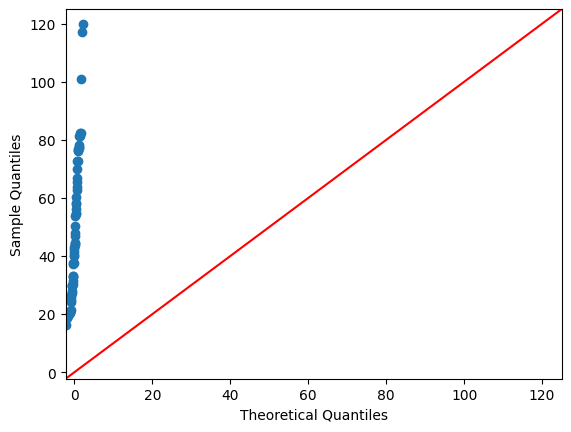

In [7]:
sm.qqplot(df['restaurant_price_index'], line ='45');

2. Homogeneidad u homocedasticidad de varianzas: se calcula sobre las variables predictoras
   - Analíticas: Chi_square

3. Independencia de las variables: se calcula sobre las variables predictoras:
   - Analíticas: Levene (datos no normales)
                 Bartlett (datos normales)
   - Gráficas: violinplot, boxplot